<a href="https://www.kaggle.com/santij95/contrasts-in-the-americas-ds-ecosystem?scriptVersionId=89391897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](http://www.radiorebelde.cu/images/images/mundo/cumbre-de-las-americas-banderas-paises.jpg)

# Introduction

In this notebook we will analyze the differences between the survey responses from the United States, versus the responses from Latin America.

But first, let me give you a brief introduction of how I chose the subject of study.

I started the project with the idea of analyzing the differences between Argentina (my home country) and the rest of the world, but I encountered a couple of problems:

* Argentina has very few responses (182).

* The rest of the world was too heterogeneous (duh) and the large amount of responses from countries like India (29% of the dataset) skewed the general distribution of the remaining countries.

With that in mind, I ended up choosing to compare Latin America (LATAM) vs the United States (USA) because:

* They have a comparable amount of responses (2650 USA vs 1706 LATAM).

* They are on the same continent and culturally the impact is not that great because they both come from the "Western Culture".

* USA is generally a good benchmark in the technology space.

In [1]:
# Familiar imports
import numpy as np
import pandas as pd

from collections import Counter

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Survey Responses
survey_df = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv",
                          #index_col=0
                       )

survey_df = survey_df.drop([0])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


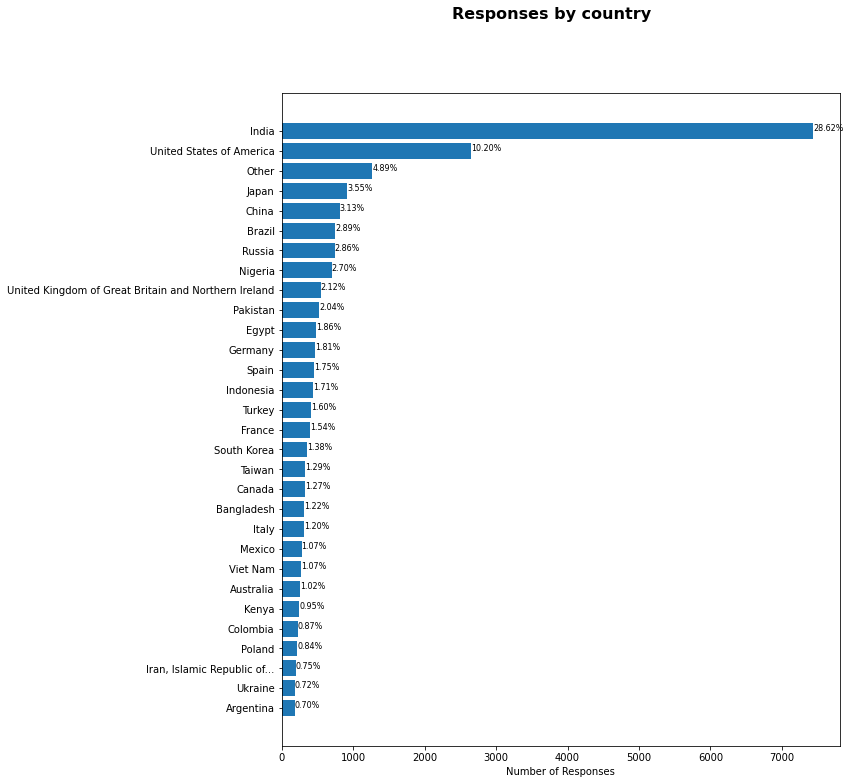

<Figure size 1440x1440 with 0 Axes>

In [3]:
barh_df = survey_df.groupby('Q3')['Q1'].count().sort_values().reset_index()

# Totals to produce a composition ratio
total = sum(barh_df['Q1'])

barh_df= barh_df.tail(30)

#plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(barh_df['Q3'], barh_df['Q1'],  align='center')
ax.set_yticks(barh_df['Q3'])
ax.set_yticklabels(barh_df['Q3'])

ax.set_xlabel('Number of Responses')
fig.suptitle('Responses by country', weight='bold', size=16)
fig.set_figheight(12)
fig.set_figwidth(10)


for i,val in enumerate(barh_df['Q1']):
    ax.text(val - 1.5, i, str("{:.2%}".format(val/total)), color="black", fontsize=8)



plt.figure(figsize=(20,20))
plt.show()

The countries from the dataset that I included in the LATAM group are:
* Argentina
* Brazil
* Chile
* Colombia
* Ecuador
* Mexico
* Peru

In [4]:
survey_df = survey_df[survey_df['Q3'].isin(['Argentina','Brazil','Chile','Colombia','Ecuador','Mexico','Peru','United States of America'])]

survey_df['Country'] = survey_df['Q3'].replace({'Argentina':'LATAM',
                                            'Brazil':'LATAM',
                                            'Chile':'LATAM',
                                            'Colombia':'LATAM',
                                            'Ecuador':'LATAM',
                                            'Mexico':'LATAM',
                                            'Peru':'LATAM',
                                            'United States of America': 'USA'})

latam_df = survey_df[survey_df['Country'] == 'LATAM']
usa_df = survey_df[survey_df['Country'] == 'USA']


# Populations Comparison

# 1. Age

* We can see that the age of the respondants from LATAM has it's peak in the 25-30 group, while in the USA the peak is at 30-35 (closely followed by 25-30).

* We can also observe that the distribution in the USA is much more flattened than LATAM, which has a steaper decrease after the 40-44 age group.

* I find interesting the peak in the 60-69 age group in the USA, which does not happen in LATAM.

Text(0, 0.5, 'Number of Responses')

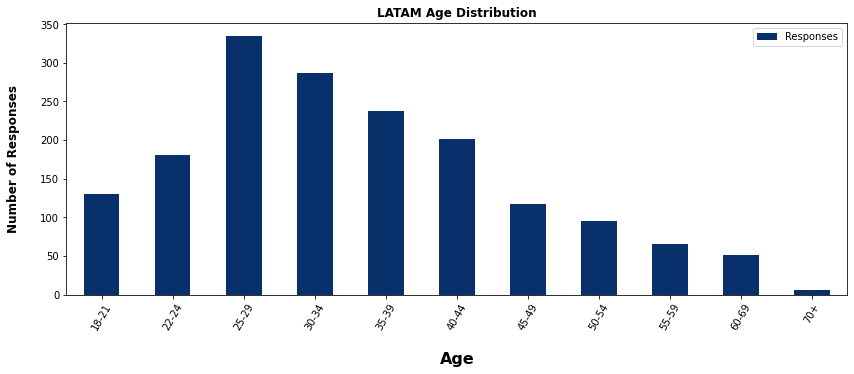

In [5]:
responses_latam = Counter(latam_df['Q1'])
df = pd.DataFrame.from_dict(responses_latam, orient='index').sort_index()
df = df.rename(columns={0: 'Responses'})

plt1 = df.plot(kind='bar',figsize=(14,5), rot=60
               ,colormap ='Blues_r'
              )
              

plt1.set_title("LATAM Age Distribution", weight='bold')

plt1.set_xlabel("Age", labelpad=20, weight='bold', size=16)
plt1.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)


In [6]:
responses_usa = Counter(usa_df['Q1'])

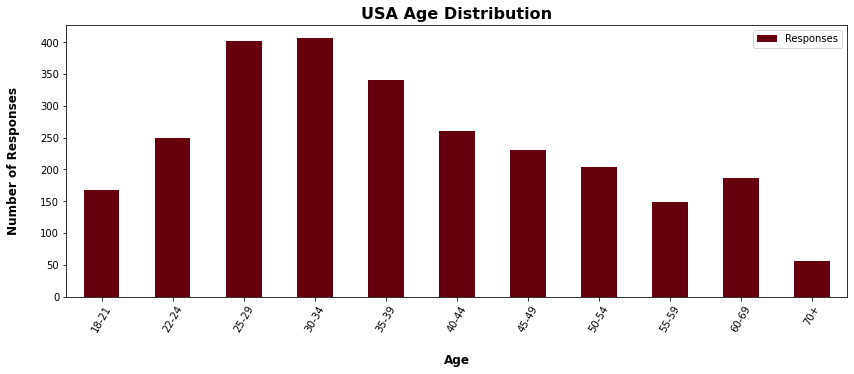

In [7]:

df = pd.DataFrame.from_dict(responses_usa, orient='index').sort_index()
df = df.rename(columns={0: 'Responses'})

plt2 = df.plot(kind='bar',figsize=(14,5), rot=60,colormap ='Reds_r')

plt2.set_title("USA Age Distribution", weight='bold', size=16)
plt2.set_xlabel("Age", labelpad=20, weight='bold', size=12)
plt2.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12);

# 2. Experience

Observing the general distribution, we can that in general the respondents from USA have more programming experience than those from LATAM, which makes sense considering that they are older (as we have seen in the previous section).

Text(0, 0.5, 'Number of Responses')

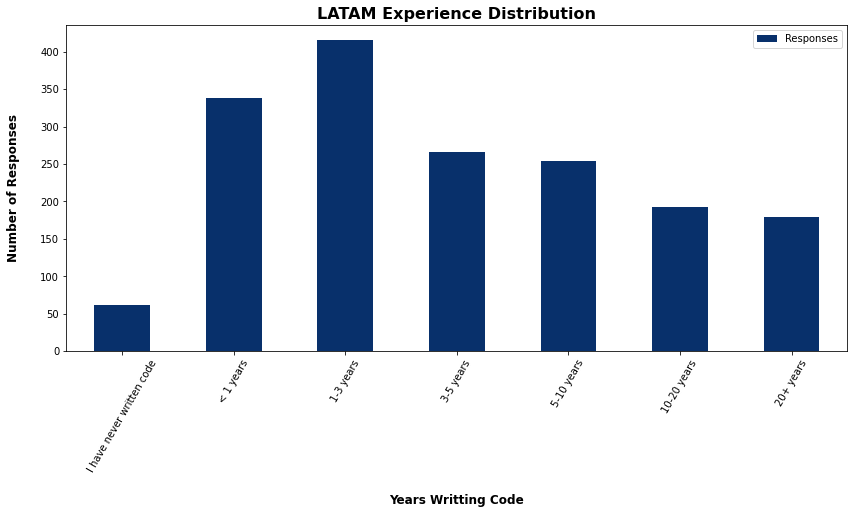

In [8]:
responses_latam = Counter(latam_df['Q6'])
df = pd.DataFrame.from_dict(responses_latam, orient='index')
df = df.rename(columns={0: 'Responses'})
reorder_list = ["I have never written code", "< 1 years", "1-3 years", "3-5 years", "5-10 years","10-20 years","20+ years"]
df = df.reindex(reorder_list)

plt1 = df.plot(kind='bar',figsize=(14,6), rot=60,colormap ='Blues_r')

plt1.set_title("LATAM Experience Distribution", weight='bold', size=16)
plt1.set_xlabel("Years Writting Code", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Number of Responses')

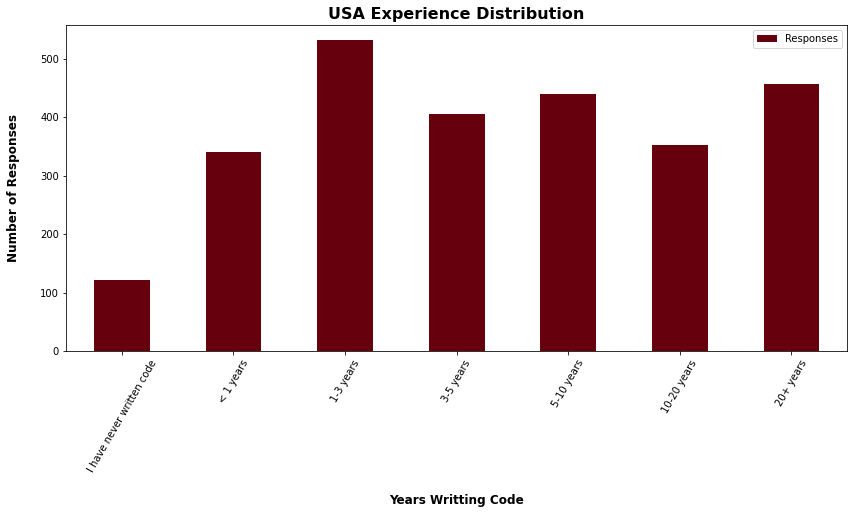

In [9]:
responses_usa = Counter(usa_df['Q6'])
df = pd.DataFrame.from_dict(responses_usa, orient='index')
df = df.rename(columns={0: 'Responses'})
reorder_list = ["I have never written code", "< 1 years", "1-3 years", "3-5 years", "5-10 years","10-20 years","20+ years"]
df = df.reindex(reorder_list)

plt1 = df.plot(kind='bar',figsize=(14,6), rot=60,colormap ='Reds_r')

plt1.set_title("USA Experience Distribution", weight='bold', size=16)
plt1.set_xlabel("Years Writting Code", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)

What's striking is that, if we compare age USA and LATAM for the same age groups, USA has also more years of experience than LATAM for each one of them
* In the **18-21 segment**, USA has 77.85% of the respondents with +1 Years of experience, vs 63.07% for LATAM.
* In the **22-24 segment**, this difference is shortened to 2% (79.6% vs 77.77%), but if we analyzed for +3 Years of experience the breach is mantained. (44.5% vs 29.44%).
* This phase shift is mantained for each one of the age groups.
* We can also see very clearly the relevance of the +45 group in the USA.

Text(105.0, 0.5, 'Years of Experience')

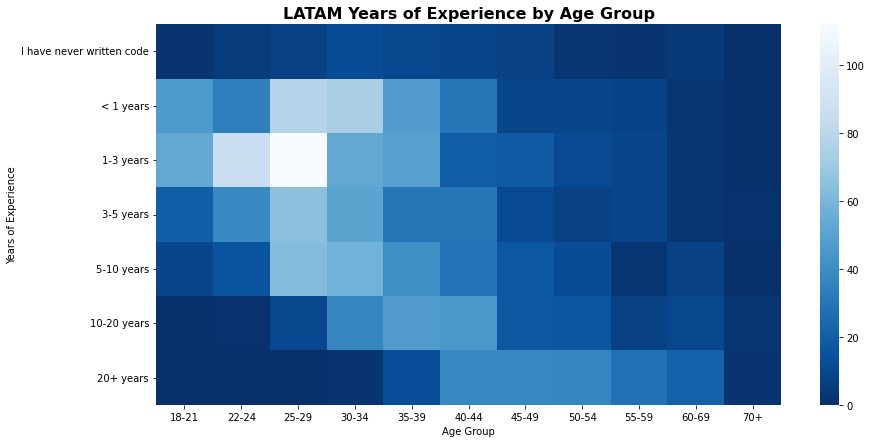

In [10]:
latam_heatmap = latam_df.groupby(['Q1','Q6'])['Q2'].count().reset_index().pivot(index='Q6', columns='Q1', values='Q2')
latam_heatmap = latam_heatmap.fillna(0)
reorder_list = ["I have never written code", "< 1 years", "1-3 years", "3-5 years", "5-10 years","10-20 years","20+ years"]
latam_heatmap = latam_heatmap.reindex(reorder_list)


plt.figure(figsize=(14,7))
plt.title("LATAM Years of Experience by Age Group", weight='bold', size=16)
sns.heatmap(latam_heatmap, cmap ='Blues_r')

plt.xlabel("Age Group")
plt.ylabel("Years of Experience")

Text(105.0, 0.5, 'Years of Experience')

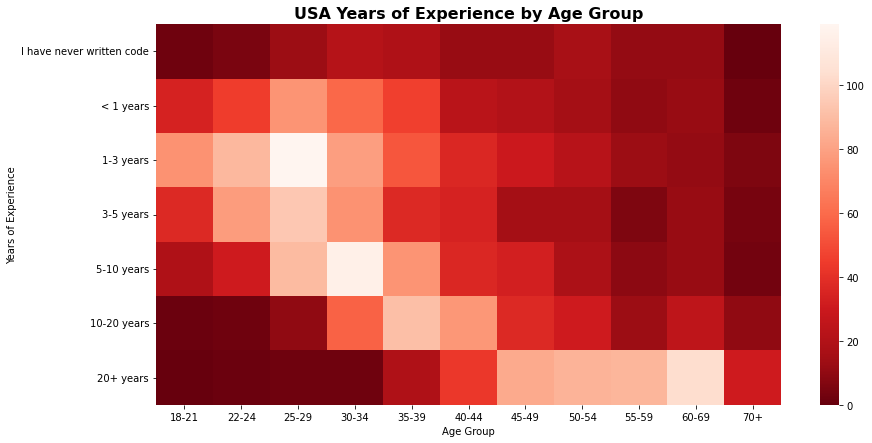

In [11]:
usa_heatmap = usa_df.groupby(['Q1','Q6'])['Q2'].count().reset_index().pivot(index='Q6', columns='Q1', values='Q2')
usa_heatmap = usa_heatmap.fillna(0)
reorder_list = ["I have never written code", "< 1 years", "1-3 years", "3-5 years", "5-10 years","10-20 years","20+ years"]
usa_heatmap = usa_heatmap.reindex(reorder_list)


plt.figure(figsize=(14,7))
plt.title("USA Years of Experience by Age Group", weight='bold', size=16)
sns.heatmap(usa_heatmap, cmap ='Reds_r')

plt.xlabel("Age Group")
plt.ylabel("Years of Experience")

# 3. Formal Education

* We can observe that there isn't a big difference in th proportion of respondants with a Bachelor's degree or higher (86.2% LATAM vs 91.7%)
* However, when we look at the ones with a Masterss degree or higher, the breach jumps to 14% (51.1% LATAM vs 64.8% USA).

This is probably one of the factors that contributes the most to the differences we saw previously in the years of experience.

Data Science is a field that started with professionals from different science areas. The higher amount of highly trained scientists in the USA gave them a head start when it started drawing atention.
In LATAM, on the other hand, a lot of people started studying it from scratch, which translates in a higher proportion of young profesionals vs the ones in USA.
References https://www.forbes.com/sites/gilpress/2013/05/28/a-very-short-history-of-data-science/

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of Responses')

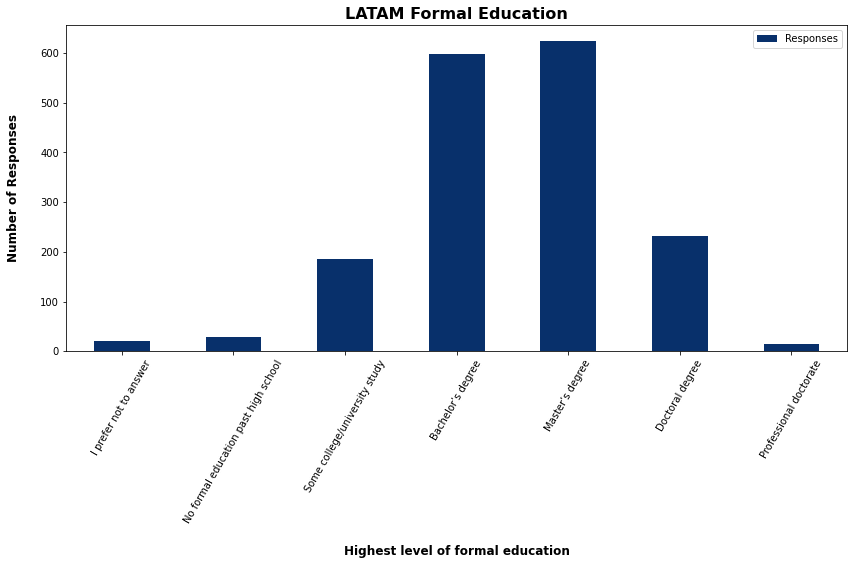

In [12]:
responses_latam = latam_df
responses_latam['Q4'] = responses_latam['Q4'].replace({'Some college/university study without earning a bachelor’s degree':'Some college/university study'})
responses_latam = Counter(responses_latam['Q4'])
df = pd.DataFrame.from_dict(responses_latam, orient='index')
df = df.rename(columns={0: 'Responses'})

reorder_list = ["I prefer not to answer",
                "No formal education past high school",
                "Some college/university study",
                "Bachelor’s degree",
                "Master’s degree",
                "Doctoral degree",
                "Professional doctorate"]

df = df.reindex(reorder_list)

plt = df.plot(kind='bar',figsize=(14,6), rot=60,colormap ='Blues_r')

plt.set_title("LATAM Formal Education", weight='bold', size=16)
plt.set_xlabel("Highest level of formal education", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)

Text(0.5, 1.0, 'LATAM Formal Education Proportion')

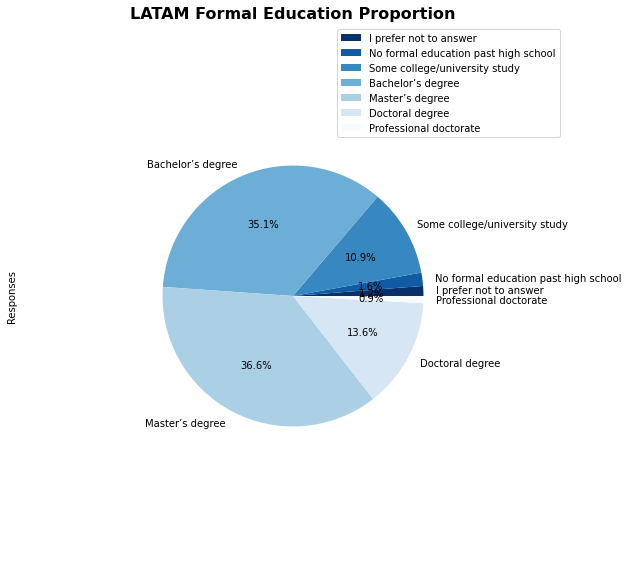

In [13]:
plt = df.plot.pie(y="Responses", figsize=(10, 10), autopct='%1.1f%%',radius=0.6,colormap ='Blues_r'
                 )
plt.set_title("LATAM Formal Education Proportion", weight='bold', size=16)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of Responses')

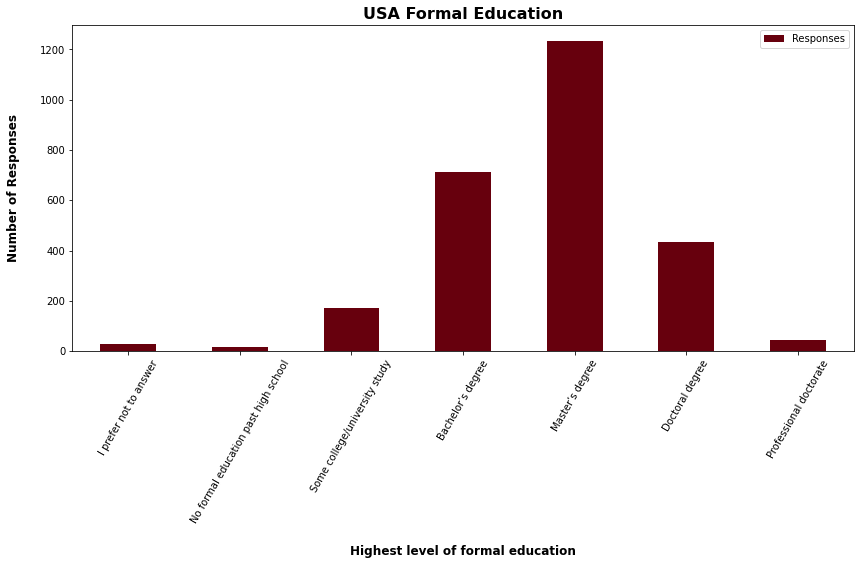

In [14]:
responses_usa = usa_df
responses_usa['Q4'] = responses_usa['Q4'].replace({'Some college/university study without earning a bachelor’s degree':'Some college/university study'})
responses_usa = Counter(responses_usa['Q4'])
df = pd.DataFrame.from_dict(responses_usa, orient='index')
df = df.rename(columns={0: 'Responses'})

reorder_list = ["I prefer not to answer",
                "No formal education past high school",
                "Some college/university study",
                "Bachelor’s degree",
                "Master’s degree",
                "Doctoral degree",
                "Professional doctorate"]

df = df.reindex(reorder_list)

plt = df.plot(kind='bar',figsize=(14,6), rot=60,colormap ='Reds_r')

plt.set_title("USA Formal Education", weight='bold', size=16)
plt.set_xlabel("Highest level of formal education", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)

Text(0.5, 1.0, 'USA Formal Education Proportion')

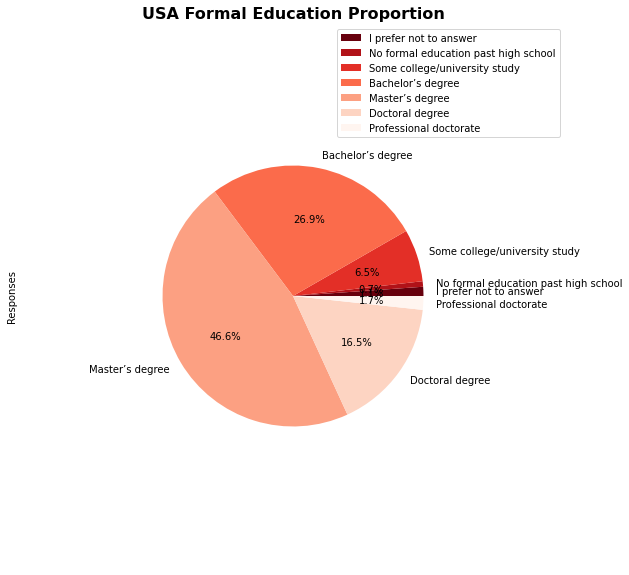

In [15]:
plt = df.plot.pie(y="Responses", figsize=(10, 10), autopct='%1.1f%%',radius=0.6,colormap ='Reds_r'
                 )
plt.set_title("USA Formal Education Proportion", weight='bold', size=16)

# 4. Salaries

Here we can see the biggest different yet. Even though we saw that the general population of respondants from USA has more years of coding experience, and the general cost of living in LATAM is lower, we can see a sharp contrast between the two:

* The mean salary for LATAM is between  **\\$18-24K** (depending on how you consider the salary groups).
* The mean salary for USA is between **\\$111-143K** (depending on how you consider the salary groups).


References: https://www.numbeo.com/cost-of-living/

Text(0, 0.5, 'Number of Responses')

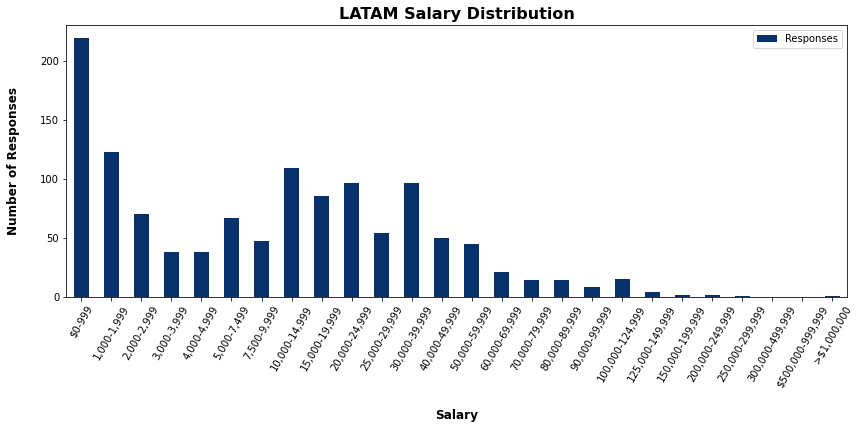

In [16]:
latam_df = latam_df[latam_df['Q25'].notnull()]
responses_latam = Counter(latam_df['Q25'])
df = pd.DataFrame.from_dict(responses_latam, orient='index').sort_index()
df = df.rename(columns={0: 'Responses'})


reorder_list = ["$0-999",
                "1,000-1,999",
                "2,000-2,999",
                "3,000-3,999",
                "4,000-4,999",
                "5,000-7,499",
                "7,500-9,999",
                "10,000-14,999",
                "15,000-19,999",
                "20,000-24,999",
                "25,000-29,999",
                "30,000-39,999",
                "40,000-49,999",
                "50,000-59,999",
                "60,000-69,999",
                "70,000-79,999",
                "80,000-89,999",
                "90,000-99,999",
                "100,000-124,999",
                "125,000-149,999",
                "150,000-199,999",
                "200,000-249,999",
                "250,000-299,999",
                "300,000-499,999",
                "$500,000-999,999",
                ">$1,000,000"]

df = df.reindex(reorder_list)

plt1 = df.plot(kind='bar',figsize=(14,5), rot=60,colormap ='Blues_r')

plt1.set_title("LATAM Salary Distribution", weight='bold', size=16)
plt1.set_xlabel("Salary", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)

In [17]:
latam_df['Min Salary'] = latam_df['Q25'].replace({  "$0-999": 0,
                                                    "1,000-1,999": 1000,
                                                    "2,000-2,999": 2000,
                                                    "3,000-3,999": 3000,
                                                    "4,000-4,999": 4000,
                                                    "5,000-7,499": 5000,
                                                    "7,500-9,999": 7500,
                                                    "10,000-14,999": 10000,
                                                    "15,000-19,999": 15000,
                                                    "20,000-24,999": 20000,
                                                    "25,000-29,999": 25000,
                                                    "30,000-39,999": 30000,
                                                    "40,000-49,999": 40000,
                                                    "50,000-59,999": 50000,
                                                    "60,000-69,999": 60000,
                                                    "70,000-79,999": 70000,
                                                    "80,000-89,999": 80000,
                                                    "90,000-99,999": 90000,
                                                    "100,000-124,999": 100000,
                                                    "125,000-149,999": 125000,
                                                    "150,000-199,999": 150000,
                                                    "200,000-249,999": 200000,
                                                    "250,000-299,999": 250000,
                                                    "300,000-499,999": 300000,
                                                    "$500,000-999,999": 500000,
                                                    ">$1,000,000": 1000000})


latam_df['Min Salary'].describe()

count       1219.000000
mean       18057.013946
std        37226.118490
min            0.000000
25%         1000.000000
50%        10000.000000
75%        25000.000000
max      1000000.000000
Name: Min Salary, dtype: float64

In [18]:
latam_df['Max Salary'] = latam_df['Q25'].replace({  "$0-999": 999,
                                                    "1,000-1,999": 1999,
                                                    "2,000-2,999": 2999,
                                                    "3,000-3,999": 3999,
                                                    "4,000-4,999": 4999,
                                                    "5,000-7,499": 7599,
                                                    "7,500-9,999": 9999,
                                                    "10,000-14,999": 14999,
                                                    "15,000-19,999": 19999,
                                                    "20,000-24,999": 24999,
                                                    "25,000-29,999": 29999,
                                                    "30,000-39,999": 39999,
                                                    "40,000-49,999": 49999,
                                                    "50,000-59,999": 59999,
                                                    "60,000-69,999": 69999,
                                                    "70,000-79,999": 79999,
                                                    "80,000-89,999": 89999,
                                                    "90,000-99,999": 99999,
                                                    "100,000-124,999": 124999,
                                                    "125,000-149,999": 149999,
                                                    "150,000-199,999": 199999,
                                                    "200,000-249,999": 249999,
                                                    "250,000-299,999": 299999,
                                                    "300,000-499,999": 499999,
                                                    "$500,000-999,999": 999999,
                                                    ">$1,000,000": 1000000})


latam_df['Max Salary'].describe()

count       1219.000000
mean       22735.834290
std        40464.181192
min          999.000000
25%         1999.000000
50%        14999.000000
75%        29999.000000
max      1000000.000000
Name: Max Salary, dtype: float64

Text(0, 0.5, 'Number of Responses')

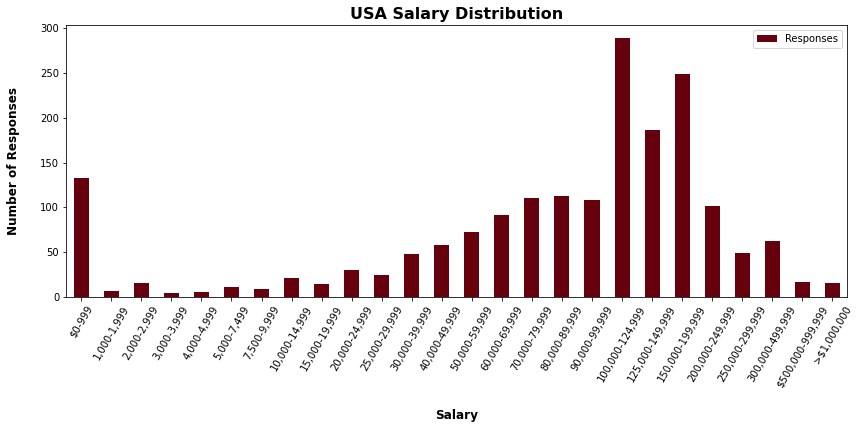

In [19]:
usa_df = usa_df[usa_df['Q25'].notnull()]
responses_usa = Counter(usa_df['Q25'])
df = pd.DataFrame.from_dict(responses_usa, orient='index').sort_index()
df = df.rename(columns={0: 'Responses'})


reorder_list = ["$0-999",
                "1,000-1,999",
                "2,000-2,999",
                "3,000-3,999",
                "4,000-4,999",
                "5,000-7,499",
                "7,500-9,999",
                "10,000-14,999",
                "15,000-19,999",
                "20,000-24,999",
                "25,000-29,999",
                "30,000-39,999",
                "40,000-49,999",
                "50,000-59,999",
                "60,000-69,999",
                "70,000-79,999",
                "80,000-89,999",
                "90,000-99,999",
                "100,000-124,999",
                "125,000-149,999",
                "150,000-199,999",
                "200,000-249,999",
                "250,000-299,999",
                "300,000-499,999",
                "$500,000-999,999",
                ">$1,000,000"]

df = df.reindex(reorder_list)

plt1 = df.plot(kind='bar',figsize=(14,5), rot=60,colormap ='Reds_r')

plt1.set_title("USA Salary Distribution", weight='bold', size=16)
plt1.set_xlabel("Salary", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Number of Responses", labelpad=20, weight='bold', size=12)

In [20]:
usa_df['Min Salary'] = usa_df['Q25'].replace({  "$0-999": 0,
                                                    "1,000-1,999": 1000,
                                                    "2,000-2,999": 2000,
                                                    "3,000-3,999": 3000,
                                                    "4,000-4,999": 4000,
                                                    "5,000-7,499": 5000,
                                                    "7,500-9,999": 7500,
                                                    "10,000-14,999": 10000,
                                                    "15,000-19,999": 15000,
                                                    "20,000-24,999": 20000,
                                                    "25,000-29,999": 25000,
                                                    "30,000-39,999": 30000,
                                                    "40,000-49,999": 40000,
                                                    "50,000-59,999": 50000,
                                                    "60,000-69,999": 60000,
                                                    "70,000-79,999": 70000,
                                                    "80,000-89,999": 80000,
                                                    "90,000-99,999": 90000,
                                                    "100,000-124,999": 100000,
                                                    "125,000-149,999": 125000,
                                                    "150,000-199,999": 150000,
                                                    "200,000-249,999": 200000,
                                                    "250,000-299,999": 250000,
                                                    "300,000-499,999": 300000,
                                                    "$500,000-999,999": 500000,
                                                    ">$1,000,000": 1000000})

usa_df['Min Salary'].describe()

count       1845.000000
mean      111263.143631
std       112436.174938
min            0.000000
25%        60000.000000
50%       100000.000000
75%       150000.000000
max      1000000.000000
Name: Min Salary, dtype: float64

In [21]:
usa_df['Max Salary'] = usa_df['Q25'].replace({  "$0-999": 999,
                                                    "1,000-1,999": 1999,
                                                    "2,000-2,999": 2999,
                                                    "3,000-3,999": 3999,
                                                    "4,000-4,999": 4999,
                                                    "5,000-7,499": 7599,
                                                    "7,500-9,999": 9999,
                                                    "10,000-14,999": 14999,
                                                    "15,000-19,999": 19999,
                                                    "20,000-24,999": 24999,
                                                    "25,000-29,999": 29999,
                                                    "30,000-39,999": 39999,
                                                    "40,000-49,999": 49999,
                                                    "50,000-59,999": 59999,
                                                    "60,000-69,999": 69999,
                                                    "70,000-79,999": 79999,
                                                    "80,000-89,999": 89999,
                                                    "90,000-99,999": 99999,
                                                    "100,000-124,999": 124999,
                                                    "125,000-149,999": 149999,
                                                    "150,000-199,999": 199999,
                                                    "200,000-249,999": 249999,
                                                    "250,000-299,999": 299999,
                                                    "300,000-499,999": 499999,
                                                    "$500,000-999,999": 999999,
                                                    ">$1,000,000": 1000000})


usa_df['Max Salary'].describe()

count       1845.000000
mean      143463.289973
std       151989.126424
min          999.000000
25%        69999.000000
50%       124999.000000
75%       199999.000000
max      1000000.000000
Name: Max Salary, dtype: float64

# Conclusions

* Historically, new technological trends arrived a few years later in Latin America.

* We can see that the USA is leading the way in the knowledge of DS.

* We can take from the analysis that, due to the higher degree of education and scale of the technological ecosystem, academics from other areas were able to switch to this discipline, while in LATAM they started to study from scratch as economic incentives were directed to this area of study (we can see it in the proportion of people with more than 20 years of experience in this area in the USA, being that it only became mainstream in the last 10 years).

* The COVID pandemic forced many companies to adopt remote work, and there is an ongoing trend in Latin America of working for companies overseas. If this carries on, the salary gap should be reduced, producing more incentives for profesional to build a career in this area.

* If young LATAM professionals keep choosing this area of study for a career, we will see a more even age/experience distribution in the years to come.